# Formatting labels as polygonal segments
We consider the data exported from PlainSight in COCO format, reformat this into YOLOv5 format and plot the resulting bounding boxes as a sanity check. We also combine the seperate exports from Pete and Thomas.

In [1]:
import os
import sys

# Root directory
root_dir = '/Users/Holmes/Research/Projects/vespai'
os.chdir(root_dir)  # Move to root_dir
sys.path.insert(0, root_dir)

# Data directory (make new directory as copy from raw data)
data_dir = os.path.join(root_dir, 'datasets/polygons-21h00')
os.listdir(data_dir)
split_ratio = (80, 10, 10)  # Three ints; should sum to 100

# Automatically reload imported programmes
%load_ext autoreload
%autoreload 2

## Create YOLOv5 annotations from JSON files
This first function reads the json_file in the list and extracts the annotations attached to each image file. The output is a list of dictionaries, one for each image.

Next it creates a temporary directory ann in which to store the YOLOv5 formatted annotations. We optionally expand the box sides by a proportion of the tight-fitting length; this helps include the legs.

In [2]:
from formatting.polygons import yolov5_polygons_from_json

json_files = []
for dataset in ['train', 'validation', 'test']:
    json_files.append(dataset + '.json')
    # for ii in range(2):
    #      json_files.append(dataset + '-set-{:02d}.json'.format(ii + 1))
dict_list = yolov5_polygons_from_json(data_dir, json_files)

['train.json', 'validation.json', 'test.json']
/Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/train.json
/Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/validation.json
/Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/test.json


In [3]:
# dict_list[0]

## Split into data subsets
Next we split the image and annotation files into an 80:10:10 split: `train`, `val` and `test` as subdirectories of the new folders `images` and `labels`.

In [4]:
from formatting.boxes import split_train_val_test

split_train_val_test(data_dir, ratio=split_ratio)

Optionally, store locations of the `train`, `val` and `test` files in a locally pointing YAML for the model to read. 

In [5]:
from formatting.boxes import write_yaml

yaml_name = 'config-local.yaml'
write_yaml(data_dir, yaml_name)

## Plot example annotated images
Vespa crabro is segmented in *yellow*;
Vespa velutina in *red*.

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3E3QN3ST4EVYXSBVATP8G1Q.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


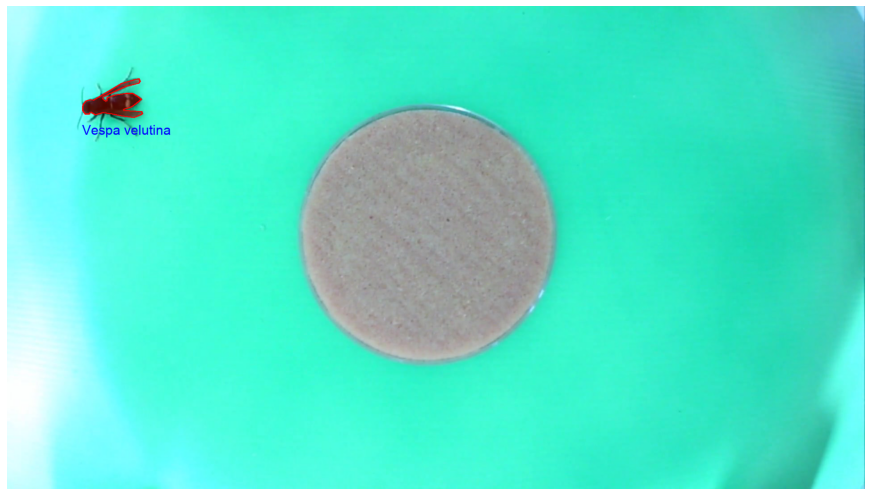

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3EDQWJ1EH748V5HWKYA2N78.txt
Vespa crabro (yellow) count:  3
Vespa velutina (red) count:  0


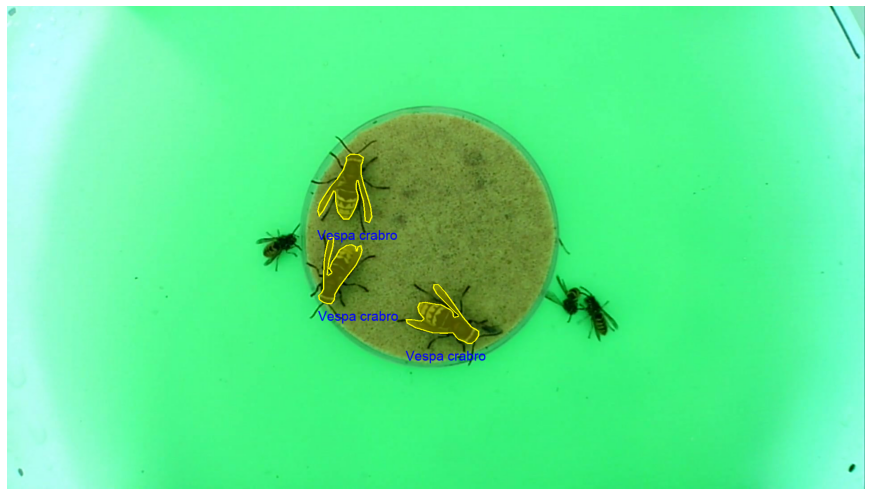

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3ED1CDY4S9SBPJX342ZHJ8E.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  3


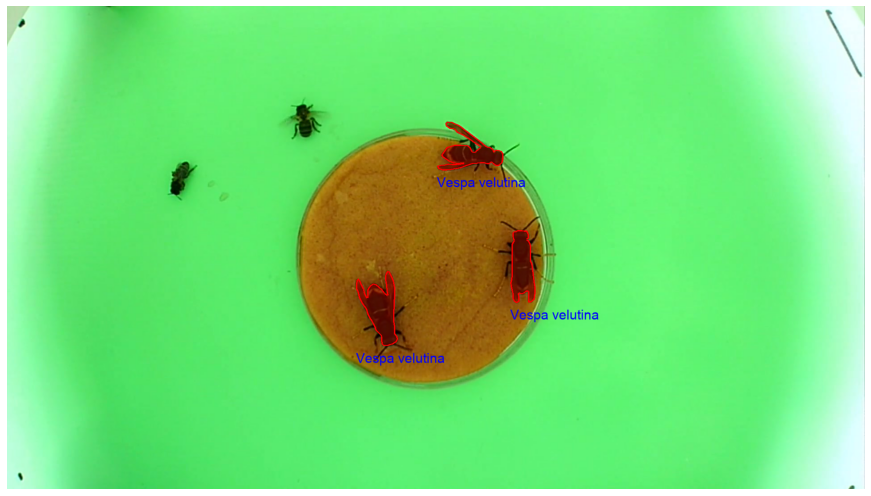

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3ED1C4EVXMW41P045W3J9NC.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  3


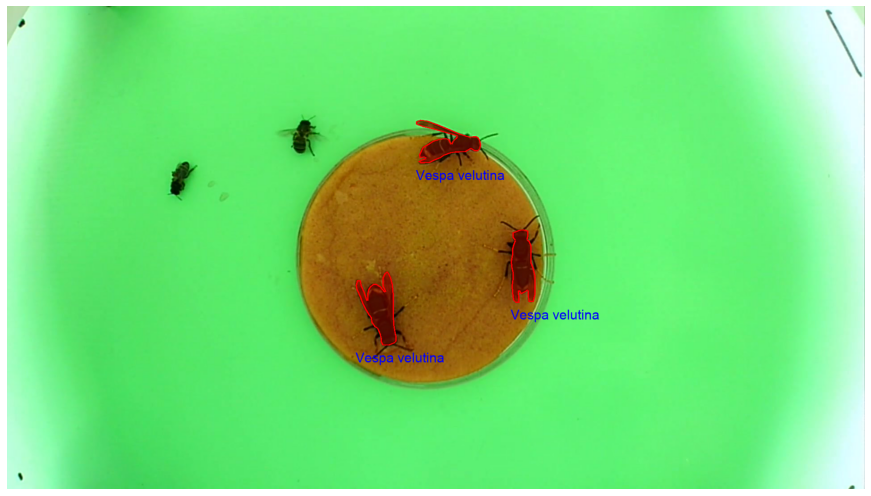

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3E3QH3BRVD48DPE5YT1RDJT.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  1


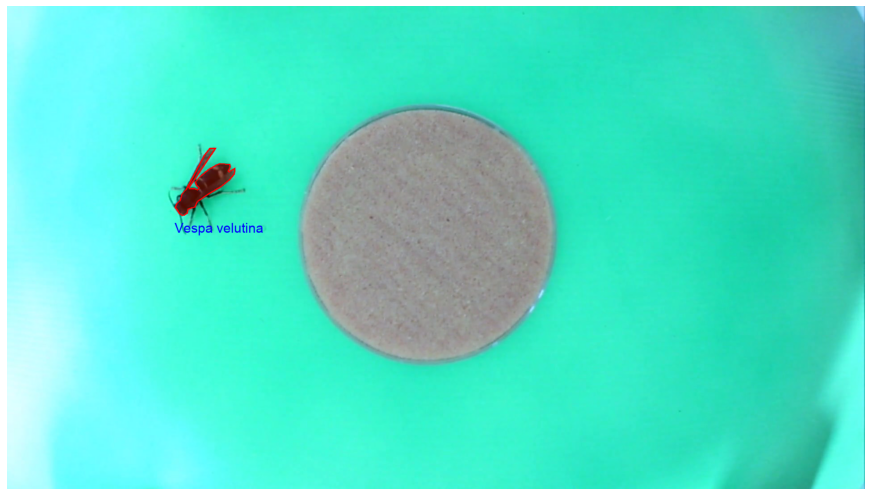

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3ED1AW7RFDDQZ84PNG1ZMKT.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  2


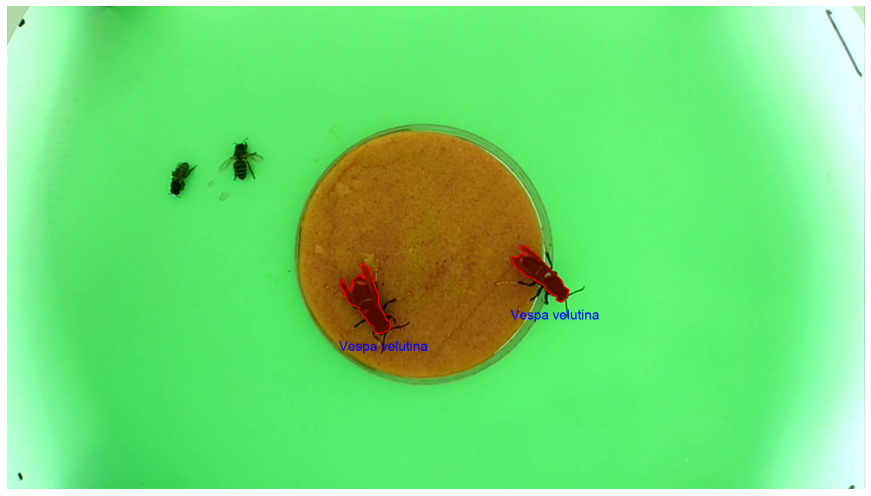

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3EDQT8940Q6CQWBXR0B4ZXM.txt
Vespa crabro (yellow) count:  3
Vespa velutina (red) count:  0


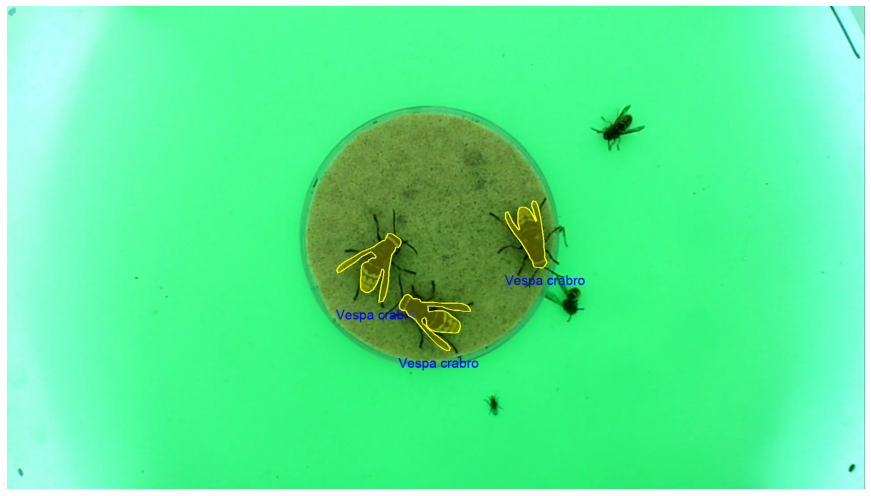

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3EDR0WDH41674F0XG8TR8DX.txt
Vespa crabro (yellow) count:  3
Vespa velutina (red) count:  0


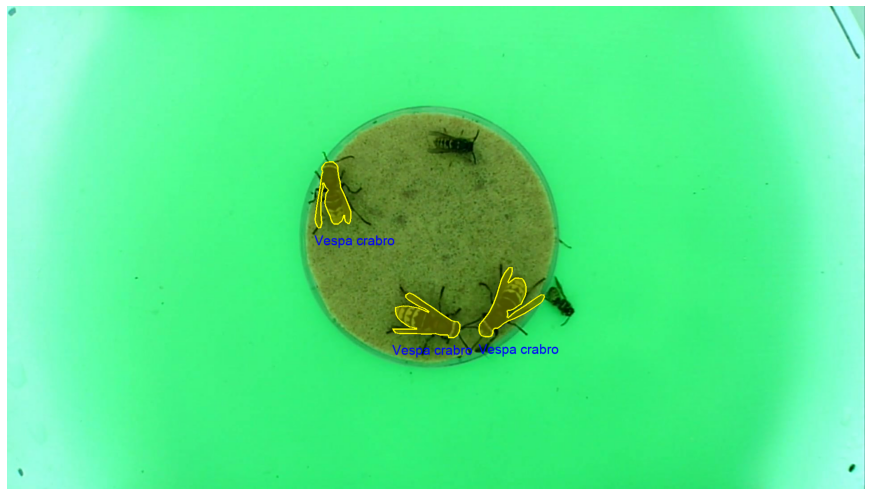

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3ECW496Q2M8HJXY0KWQ5VSA.txt
Vespa crabro (yellow) count:  0
Vespa velutina (red) count:  2


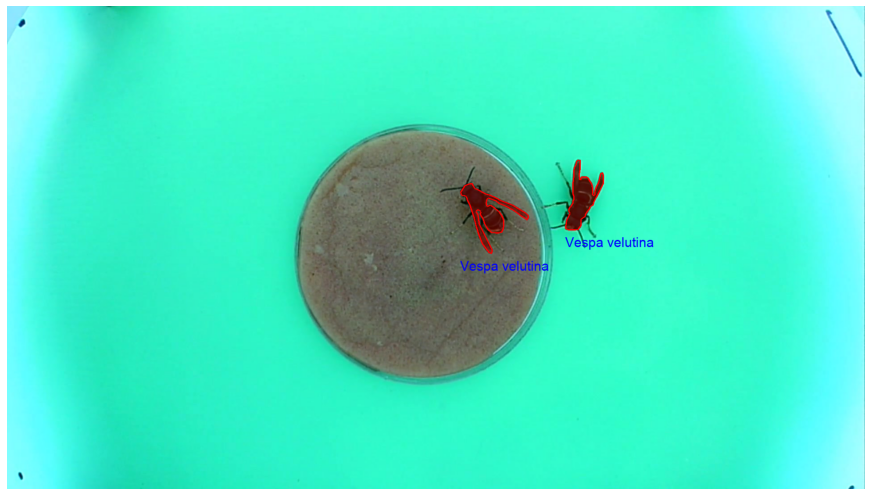

File name: /Users/Holmes/Research/Projects/vespai/datasets/polygons-21h00/labels/test/01G3EDR1FP1752PF4EQVTB5D9B.txt
Vespa crabro (yellow) count:  3
Vespa velutina (red) count:  0


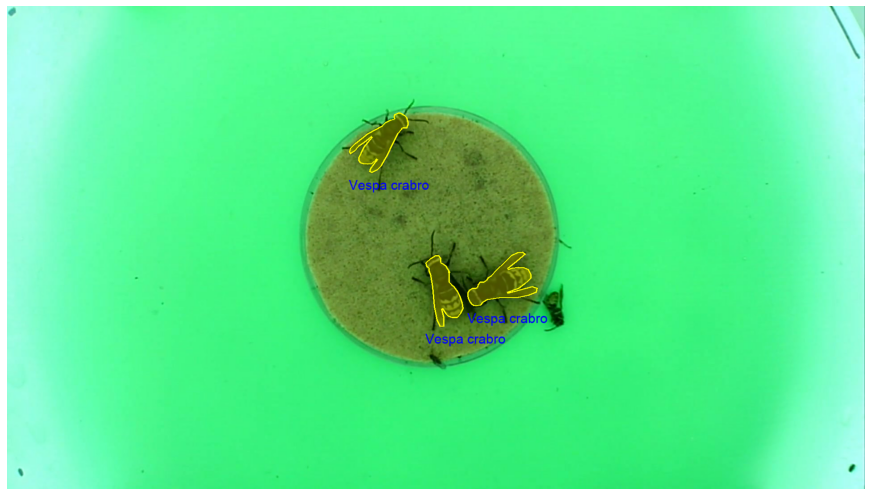

In [6]:
import glob
import random
from formatting.polygons import check_polys
%matplotlib inline

annotation_files = glob.glob(os.path.join(data_dir, 'labels/test/*.txt'))

# Randomly choose annotation files to overlay onto images
random.seed(0)
selection = random.choices(annotation_files, k=10)


# `plot_bounding_boxes` uses PIL.ImageDraw: if problem, set `print_labels=False`.
os.makedirs(os.path.join(data_dir, 'examples'), exist_ok=True)
for file in selection:
    print('File name:', file)
    fig, file_name = check_polys(file, print_labels=True)
    fig.savefig(os.path.join(
            data_dir, 'examples', 'labelled-' + os.path.basename(file_name)
        ))
